<a href="https://colab.research.google.com/github/rachelhakes/Machine-Learning/blob/main/Data_Prep_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns


# Mount Drive and Load the Dataset

In [ ]:
## mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load the dataset

data_url = '/content/drive/MyDrive/comp2_dataexcel.xlsx'

df = pd.read_excel(data_url)
df.head(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks,y
0,0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,...,-36.4,4.857,5191.0,54.59,1.0,Portuguese,2.03,0.67,yes,no
1,1,57.0,services,married,high.school,unknown,no,no,telephone,may,...,-36.4,4.857,5191.0,48.91,4.0,Portuguese,3.50,35.93,yes,no
2,2,37.0,services,married,high.school,no,yes,no,telephone,may,...,-36.4,4.857,5191.0,NaN,3.0,English,2.34,8.16,yes,no
3,3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,...,-36.4,4.857,5191.0,120.77,1.0,Portuguese,2.15,3.60,yes,no
4,4,56.0,services,married,high.school,no,no,yes,telephone,may,...,-36.4,4.857,5191.0,61.12,5.0,Portuguese,4.06,49.35,yes,no
5,5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,...,-36.4,4.857,5191.0,74.02,4.0,Portuguese,3.46,35.06,yes,no
6,6,59.0,admin.,NaN,professional.course,no,no,no,telephone,may,...,-36.4,4.857,5191.0,61.58,5.0,NaN,4.69,64.63,no,no
7,7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,...,NaN,4.857,5191.0,67.77,5.0,Portuguese,NaN,46.62,yes,no
8,8,24.0,technician,single,professional.course,no,yes,no,telephone,may,...,-36.4,4.857,5191.0,63.40,5.0,Portuguese,4.69,64.58,no,no
9,9,25.0,services,single,high.school,no,yes,no,telephone,may,...,-36.4,4.857,5191.0,63.51,5.0,Portuguese,4.16,51.92,yes,no


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'total_assets', 'customer_ratings', 'customer_language',
       'rep_avg_rating', 'customer_length', 'other_banks', 'y'],
      dtype='object')

In [ ]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
# make a copy of the dataframe
df1 = df.copy()

Section Summary:  
Loaded in the data and viewed the top ten rows. Dropped the 'Unnamed:0' column because it is unnecessary to have an index column immediately next to the dataframe index (redundant).

# Check Types of the Dataframe

In [ ]:
df.dtypes

age                  float64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
duration             float64
campaign             float64
pdays                float64
previous             float64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
total_assets         float64
customer_ratings     float64
customer_language     object
rep_avg_rating       float64
customer_length      float64
other_banks           object
y                     object
dtype: object

In [ ]:
(df.isna().sum()/df.shape[0]).round(4)*100

age                  0.05
job                  0.38
marital              2.62
education            3.70
default              3.96
housing              0.45
loan                 1.41
contact              4.02
month                4.82
day_of_week          3.13
duration             2.47
campaign             4.49
pdays                1.32
previous             0.01
poutcome             3.76
emp.var.rate         1.89
cons.price.idx       2.32
cons.conf.idx        4.52
euribor3m            3.42
nr.employed          2.93
total_assets         2.07
customer_ratings     3.92
customer_language    2.56
rep_avg_rating       4.82
customer_length      1.53
other_banks          0.77
y                    0.00
dtype: float64

Section Summary:  
Familiarizing ourselves with the data by looking at dtypes and understanding about how much missing data there is. No column has more than 5% of its data missing, which is good for data validity and the assumptions we make before imputing the data later.

# Split the Data and the Target into Two DataFrames

In [ ]:
# make a new dataframe without target column
df_data = df[['age', 'job', 'marital', 'education', 'default', 'housing',
           'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
           'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
           'cons.conf.idx', 'euribor3m', 'nr.employed', 'total_assets',
           'customer_ratings', 'customer_language', 'rep_avg_rating',
           'customer_length', 'other_banks']]
df_data.head()
# check the newly created dataframe
df_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,-36.4,4.857,5191.0,54.59,1.0,Portuguese,2.03,0.67,yes
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,48.91,4.0,Portuguese,3.50,35.93,yes
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,NaN,3.0,English,2.34,8.16,yes
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,120.77,1.0,Portuguese,2.15,3.60,yes
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,61.12,5.0,Portuguese,4.06,49.35,yes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


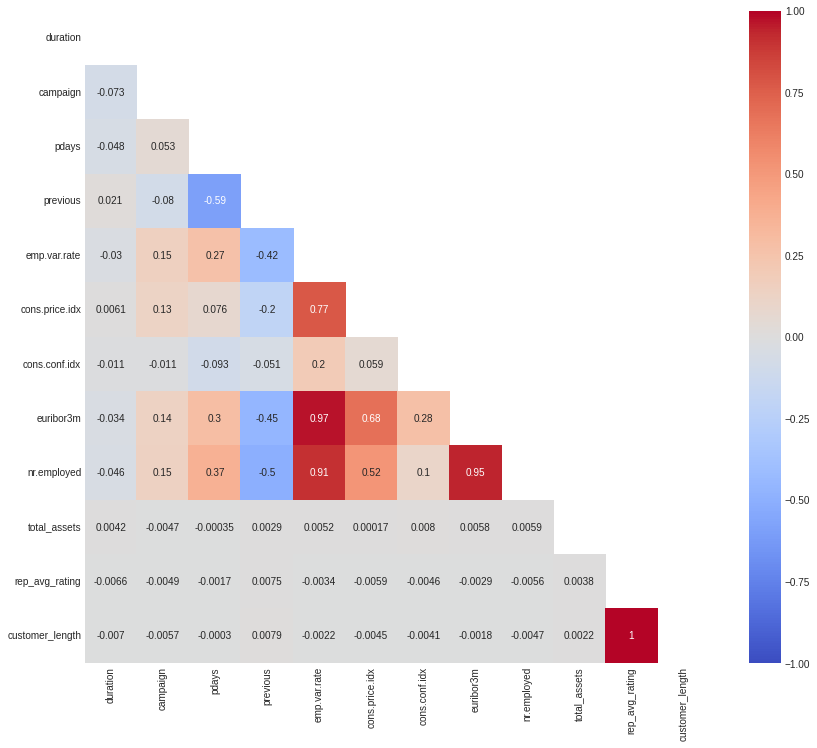

In [ ]:
# create a mask for the upper triangle
numerical_and_target = df[['duration', 'campaign', 'pdays', 'previous',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length', 'y']]
corr = numerical_and_target.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot again
plt.figure(figsize=(14,12))
sns.heatmap(corr,
            vmin=-1, vmax=1, # set the color bar range to [-1, 1]
            cmap='coolwarm', # set the color scheme to 'coolwarm'
            annot=True, # annotate the grid
            mask = mask) # mask the upper triangle

In [ ]:
## for above
# need to take care of these columns with high correlations
# euribor3m, customer_length, rep_avg_rating
# set the threshold at 0.9

In [ ]:
# drop duration by not including it in selected columns
df_data = df_data[['age', 'job', 'marital', 'education', 'default', 'housing',
           'loan', 'contact', 'month', 'day_of_week', 'campaign',
           'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
           'cons.conf.idx', 'euribor3m', 'nr.employed', 'total_assets',
           'customer_ratings', 'customer_language', 'rep_avg_rating',
           'customer_length', 'other_banks']]
df_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,-36.4,4.857,5191.0,54.59,1.0,Portuguese,2.03,0.67,yes
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,48.91,4.0,Portuguese,3.50,35.93,yes
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,NaN,3.0,English,2.34,8.16,yes
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,120.77,1.0,Portuguese,2.15,3.60,yes
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,61.12,5.0,Portuguese,4.06,49.35,yes


In [ ]:
df_target = df['y']
df_target.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

Section Summary:  
Making a new dataframe without the target column to prepare for train, test, split. Also created a dataframe with numerical variables and the target to visualize a correlation matrix. We dropped the `duration` column since it was highly correlated to the target. `euribor3m`, `customer_length`, and `rep_avg_rating` are highly correlated to each other (above our threshold of 0.9). We will not select more than one of these features during feature selection due to their high correlation.

# Train, Test, Split

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Split `data` into `X_train` and `X_test`
# Split `target` into `y_train` and `y_test`
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.25, random_state=2019)

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
8124,38.0,student,single,university.degree,no,no,no,telephone,jun,mon,...,94.465,-41.8,4.865,5228.1,40.44,4.0,English,3.64,39.30,yes
34522,42.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,92.893,-46.2,1.266,5099.1,31.48,4.0,English,3.63,39.19,yes
5007,32.0,blue-collar,married,basic.9y,NaN,no,no,telephone,may,wed,...,93.994,-36.4,4.858,5191.0,80.14,4.0,Portuguese,3.74,41.79,yes
1907,46.0,self-employed,married,basic.9y,unknown,yes,no,telephone,may,fri,...,93.994,-36.4,4.855,5191.0,61.00,2.0,Portuguese,2.19,4.51,yes
40686,83.0,retired,divorced,basic.4y,no,no,no,cellular,sep,thu,...,94.199,-37.5,0.879,4963.6,33.76,5.0,NaN,4.41,57.77,no


In [ ]:
#### assert that the indexes are the same before reindexing

In [ ]:
assert X_train.index.all() == y_train.index.all()
assert X_test.index.all() == y_test.index.all()

In [ ]:
X_train = X_train.reset_index(drop=True)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
0,38.0,student,single,university.degree,no,no,no,telephone,jun,mon,...,94.465,-41.8,4.865,5228.1,40.44,4.0,English,3.64,39.30,yes
1,42.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,92.893,-46.2,1.266,5099.1,31.48,4.0,English,3.63,39.19,yes
2,32.0,blue-collar,married,basic.9y,NaN,no,no,telephone,may,wed,...,93.994,-36.4,4.858,5191.0,80.14,4.0,Portuguese,3.74,41.79,yes
3,46.0,self-employed,married,basic.9y,unknown,yes,no,telephone,may,fri,...,93.994,-36.4,4.855,5191.0,61.00,2.0,Portuguese,2.19,4.51,yes
4,83.0,retired,divorced,basic.4y,no,no,no,cellular,sep,thu,...,94.199,-37.5,0.879,4963.6,33.76,5.0,NaN,4.41,57.77,no


In [ ]:
X_test = X_test.reset_index(drop=True)
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,customer_ratings,customer_language,rep_avg_rating,customer_length,other_banks
0,48.0,blue-collar,married,NaN,no,no,no,telephone,may,tue,...,93.994,-36.4,4.857,5191.0,38.19,3.0,Portuguese,2.84,20.26,yes
1,41.0,services,divorced,high.school,no,no,no,cellular,may,wed,...,92.893,-46.2,1.334,5099.1,42.62,4.0,Portuguese,3.15,27.69,yes
2,44.0,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,43.57,4.0,Portuguese,3.55,37.18,yes
3,71.0,retired,married,professional.course,no,yes,yes,telephone,nov,tue,...,92.649,-30.1,0.720,5017.5,78.34,4.0,Portuguese,3.40,33.65,yes
4,32.0,self-employed,single,university.degree,no,yes,no,NaN,aug,thu,...,93.444,-36.1,4.963,5228.1,51.15,5.0,Portuguese,4.73,65.47,unknown


In [ ]:
y_train = y_train.reset_index(drop=True)
y_train.head()

0     no
1     no
2    yes
3     no
4    yes
Name: y, dtype: object

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     no
1     no
2     no
3    yes
4     no
Name: y, dtype: object

Section Summary:  
Train, test, split the data and made sure the indicies matched before resetting the indicies to normal counting numbers for each dataframe.

# Initial Data Validation and Exploration

In [ ]:
X_train.shape

(33980, 25)

In [ ]:
y_train.shape

(33980,)

In [ ]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
assert X_train.shape[1] == X_test.shape[1]

In [ ]:
print("***** Train_Set *****")
print(X_train.describe())
print("\n")
print("***** Test_Set *****")
print(X_test.describe())

***** Train_Set *****
                age      campaign         pdays      previous  emp.var.rate  \
count  33967.000000  32467.000000  33546.000000  33977.000000  33342.000000   
mean      40.031560      2.565312    963.004173      0.172882      0.080211   
std       10.382697      2.754913    185.608529      0.495402      1.571956   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       32.000000      1.000000    999.000000      0.000000     -1.800000   
50%       38.000000      2.000000    999.000000      0.000000      1.100000   
75%       47.000000      3.000000    999.000000      0.000000      1.400000   
max       98.000000     43.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    33201.000000   32466.000000  32829.000000  33000.000000   
mean        93.575726     -40.490427      3.625983   5166.997179   
std          0.578664       4.628517      1.732367     72.1086

In [ ]:
print("*****In the train set*****")
print(X_train.isna().sum())
print("\n")
print("*****In the test set*****")
print(X_test.isna().sum())

*****In the train set*****
age                    13
job                   137
marital               863
education            1297
default              1352
housing               160
loan                  482
contact              1377
month                1664
day_of_week          1079
campaign             1513
pdays                 434
previous                3
poutcome             1275
emp.var.rate          638
cons.price.idx        779
cons.conf.idx        1514
euribor3m            1151
nr.employed           980
total_assets          721
customer_ratings     1306
customer_language     891
rep_avg_rating       1627
customer_length       524
other_banks           243
dtype: int64


*****In the test set*****
age                    9
job                   36
marital              324
education            378
default              441
housing               45
loan                 158
contact              445
month                522
day_of_week          338
campaign             522
pdays  

In [ ]:
print("***** Train_Set *****")
print(y_train.describe())
print("\n")
print("***** Test_Set *****")
print(y_test.describe())

***** Train_Set *****
count     33980
unique        2
top          no
freq      30182
Name: y, dtype: object


***** Test_Set *****
count     11327
unique        2
top          no
freq      10034
Name: y, dtype: object


In [ ]:
print("*****In the train set*****")
print(y_train.isna().sum())
print("\n")
print("*****In the test set*****")
print(y_test.isna().sum())

*****In the train set*****
0


*****In the test set*****
0


Section Summary:  
Making sure the shapes of the data

# Categorical EDA Train vs. Test Data

Text(0.5, 0, 'Job Descriptions')

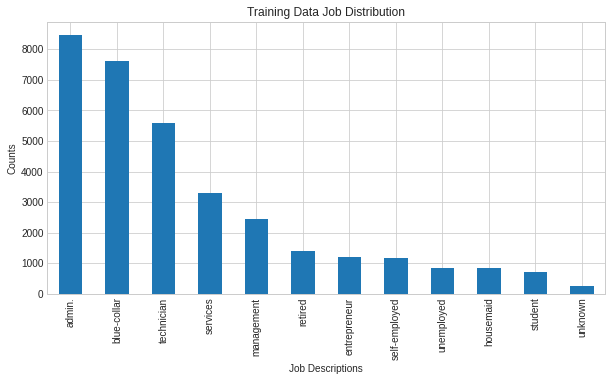

In [ ]:
plt.figure(figsize=(10,5))
X_train['job'].value_counts().plot(kind='bar')
plt.title('Training Data Job Distribution')
plt.ylabel('Counts')
plt.xlabel('Job Descriptions')

Text(0.5, 0, 'Job Descriptions')

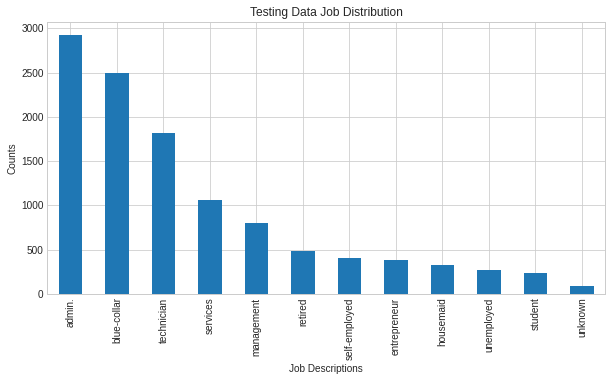

In [ ]:
## need to bin into 5 job descriptions later
# top 4 + "other"
# job vs. no job (binary)
plt.figure(figsize=(10,5))
X_test['job'].value_counts().plot(kind='bar')
plt.title('Testing Data Job Distribution')
plt.ylabel('Counts')
plt.xlabel('Job Descriptions')

Text(0.5, 0, 'Housing Loan')

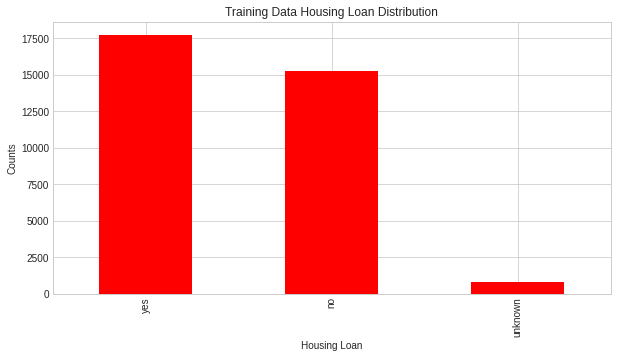

In [ ]:
plt.figure(figsize=(10,5))
X_train['housing'].value_counts().plot(kind='bar', color='red')
plt.title('Training Data Housing Loan Distribution')
plt.ylabel('Counts')
plt.xlabel('Housing Loan')

Text(0.5, 0, 'Housing Loan')

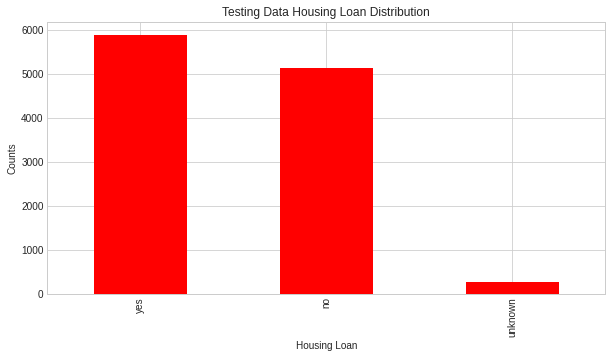

In [ ]:
plt.figure(figsize=(10,5))
X_test['housing'].value_counts().plot(kind='bar', color='red')
plt.title('Testing Data Housing Loan Distribution')
plt.ylabel('Counts')
plt.xlabel('Housing Loan')

Text(0.5, 0, 'Education Level')

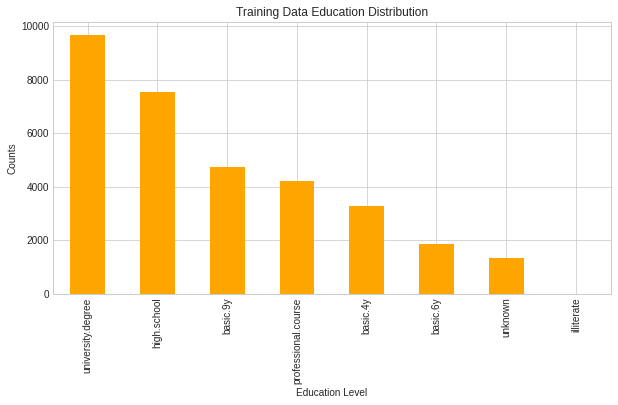

In [ ]:
plt.figure(figsize=(10,5))
X_train['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Training Data Education Distribution')
plt.ylabel('Counts')
plt.xlabel('Education Level')

Text(0.5, 0, 'Education Level')

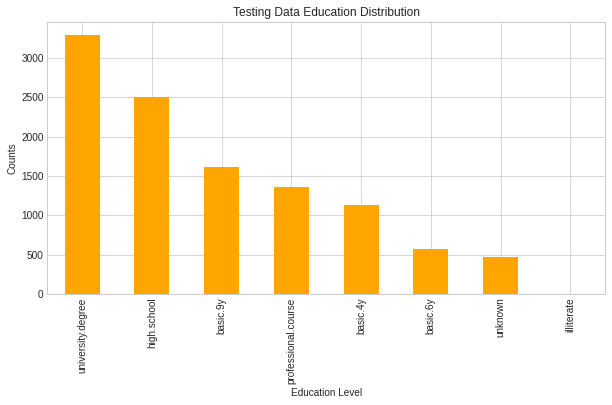

In [ ]:
# need to bin to 5 or less
# college, high school, below
plt.figure(figsize=(10,5))
X_test['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Testing Data Education Distribution')
plt.ylabel('Counts')
plt.xlabel('Education Level')

Text(0.5, 0, 'Month')

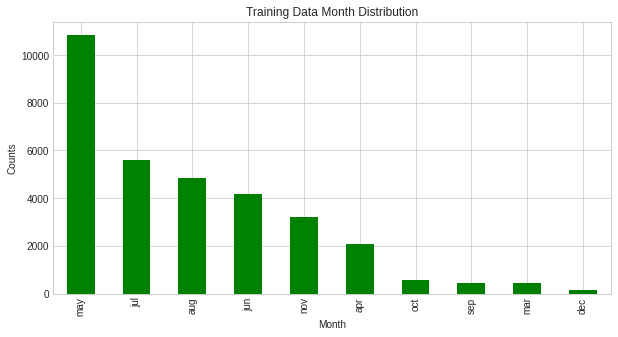

In [ ]:
# bin month into quarters, but there is no january or february
# maybe they started this campaign in march
plt.figure(figsize=(10,5))
X_train['month'].value_counts().plot(kind='bar', color='green')
plt.title('Training Data Month Distribution')
plt.ylabel('Counts')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

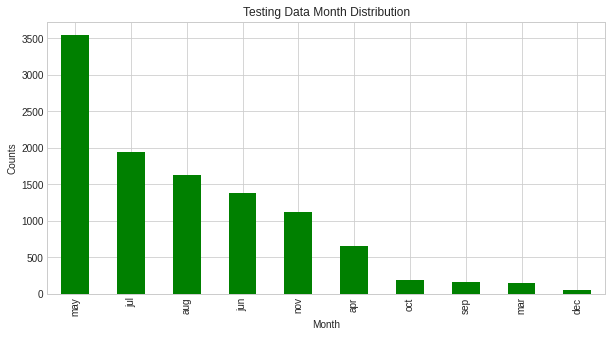

In [ ]:
plt.figure(figsize=(10,5))
X_test['month'].value_counts().plot(kind='bar', color='green')
plt.title('Testing Data Month Distribution')
plt.ylabel('Counts')
plt.xlabel('Month')

Text(0.5, 0, 'Term Deposit Subscription')

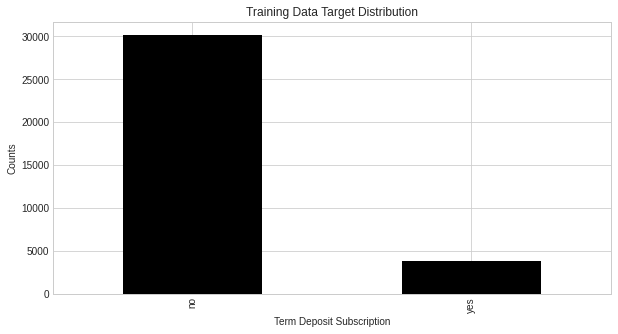

In [ ]:
plt.figure(figsize=(10,5))
y_train.value_counts().plot(kind='bar', color='black')
plt.title('Training Data Target Distribution')
plt.ylabel('Counts')
plt.xlabel('Term Deposit Subscription')

Text(0.5, 0, 'Term Deposit Subscription')

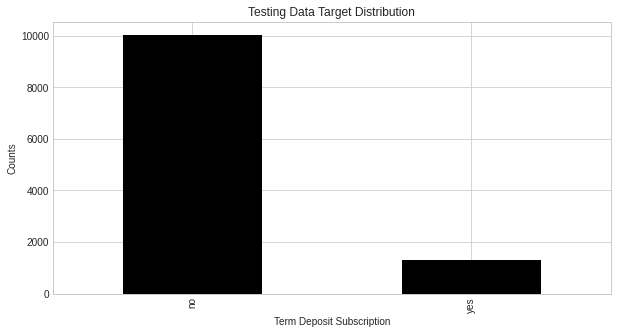

In [ ]:
plt.figure(figsize=(10,5))
y_test.value_counts().plot(kind='bar', color='black')
plt.title('Testing Data Target Distribution')
plt.ylabel('Counts')
plt.xlabel('Term Deposit Subscription')

###***************

In [ ]:
# calculate the ratio
# heavy imbalance issues
# will have to use smote

###***

# Numerical EDA Train vs. Test Data

In [ ]:
### need to do with side-by-side box plots

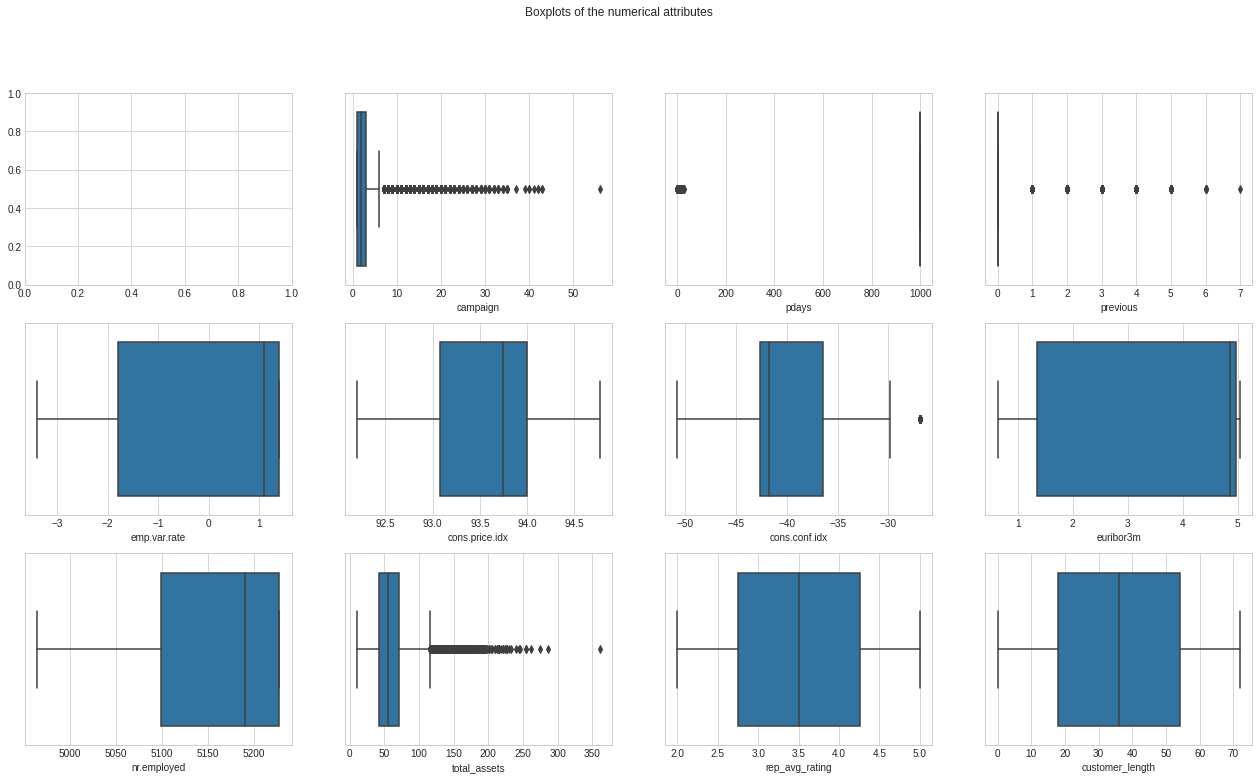

In [ ]:
## group these box plots by demographics, economics, etc.
# do not have to use subplots if you use group

fig, axes = plt.subplots(3, 4, figsize = (22, 12))

plt.suptitle("Boxplots of the numerical attributes")

sns.boxplot(ax=axes[0, 1], data = df_data, x = 'campaign')
sns.boxplot(ax=axes[0, 2], data = df_data, x = 'pdays')
sns.boxplot(ax=axes[0, 3], data = df_data, x = 'previous')
sns.boxplot(ax=axes[1, 0], data = df_data, x = 'emp.var.rate')
sns.boxplot(ax=axes[1, 1], data = df_data, x = 'cons.price.idx')
sns.boxplot(ax=axes[1, 2], data = df_data, x = 'cons.conf.idx')
sns.boxplot(ax=axes[1, 3], data = df_data, x = 'euribor3m')
sns.boxplot(ax=axes[2, 0], data = df_data, x = 'nr.employed')
sns.boxplot(ax=axes[2, 1], data = df_data, x = 'total_assets')
sns.boxplot(ax=axes[2, 2], data = df_data, x = 'rep_avg_rating')
sns.boxplot(ax=axes[2, 3], data = df_data, x = 'customer_length')



plt.show()

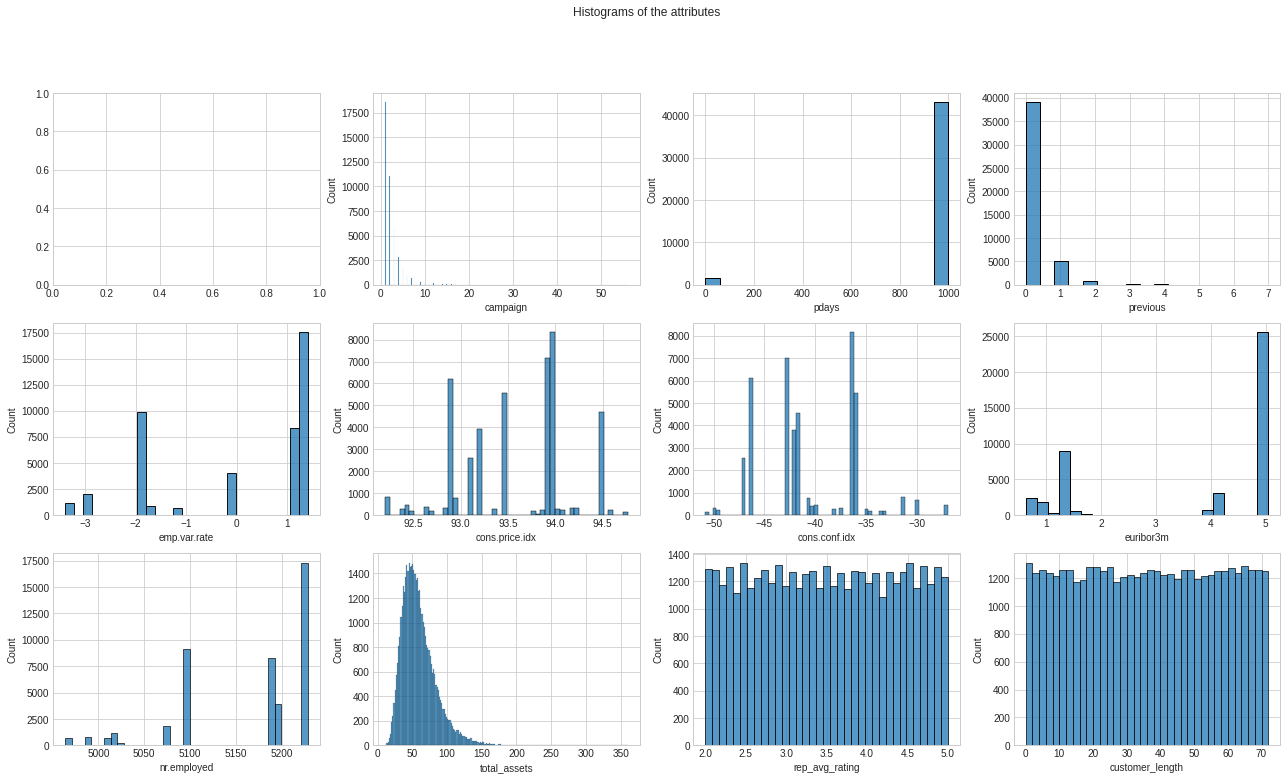

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (22, 12))

plt.suptitle("Histograms of the attributes")

sns.histplot(ax=axes[0, 1], data = df_data, x = 'campaign')
sns.histplot(ax=axes[0, 2], data = df_data, x = 'pdays')
sns.histplot(ax=axes[0, 3], data = df_data, x = 'previous')
sns.histplot(ax=axes[1, 0], data = df_data, x = 'emp.var.rate')
sns.histplot(ax=axes[1, 1], data = df_data, x = 'cons.price.idx')
sns.histplot(ax=axes[1, 2], data = df_data, x = 'cons.conf.idx')
sns.histplot(ax=axes[1, 3], data = df_data, x = 'euribor3m')
sns.histplot(ax=axes[2, 0], data = df_data, x = 'nr.employed')
sns.histplot(ax=axes[2, 1], data = df_data, x = 'total_assets')
sns.histplot(ax=axes[2, 2], data = df_data, x = 'rep_avg_rating')
sns.histplot(ax=axes[2, 3], data = df_data, x = 'customer_length')

# Split the Dataframe based on Variable Types

In [ ]:
continuous_train = X_train[['age', 'campaign', 'previous', 'pdays', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]
continuous_train.head()

,age,campaign,previous,pdays,customer_ratings,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,rep_avg_rating,customer_length
0,38.0,4.0,0.0,999.0,4.0,1.4,94.465,-41.8,4.865,5228.1,40.44,3.64,39.30
1,42.0,1.0,0.0,999.0,4.0,-1.8,92.893,-46.2,1.266,5099.1,31.48,3.63,39.19
2,32.0,3.0,0.0,999.0,4.0,1.1,93.994,-36.4,4.858,5191.0,80.14,3.74,41.79
3,46.0,7.0,0.0,999.0,2.0,1.1,93.994,-36.4,4.855,5191.0,61.00,2.19,4.51
4,83.0,1.0,3.0,9.0,5.0,-1.1,94.199,-37.5,0.879,4963.6,33.76,4.41,57.77


In [ ]:
continuous_test = X_test[['age', 'campaign', 'previous', 'pdays', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]
continuous_test.head()

,age,campaign,previous,pdays,customer_ratings,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_assets,rep_avg_rating,customer_length
0,48.0,2.0,0.0,999.0,3.0,NaN,93.994,-36.4,4.857,5191.0,38.19,2.84,20.26
1,41.0,2.0,0.0,999.0,4.0,-1.8,92.893,-46.2,1.334,5099.1,42.62,3.15,27.69
2,44.0,1.0,0.0,999.0,4.0,1.1,93.994,-36.4,4.857,5191.0,43.57,3.55,37.18
3,71.0,1.0,0.0,999.0,4.0,-3.4,92.649,-30.1,0.720,5017.5,78.34,3.40,33.65
4,32.0,3.0,0.0,999.0,5.0,1.4,93.444,-36.1,4.963,5228.1,51.15,4.73,65.47


In [ ]:
categorical_train = X_train[['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome',
                         'customer_language', 'other_banks']]
categorical_train.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,customer_language,other_banks
0,student,single,university.degree,no,no,no,telephone,jun,mon,nonexistent,English,yes
1,admin.,married,high.school,no,yes,no,cellular,may,thu,nonexistent,English,yes
2,blue-collar,married,basic.9y,NaN,no,no,telephone,may,wed,nonexistent,Portuguese,yes
3,self-employed,married,basic.9y,unknown,yes,no,telephone,may,fri,nonexistent,Portuguese,yes
4,retired,divorced,basic.4y,no,no,no,cellular,sep,thu,success,NaN,no


In [ ]:
categorical_test = X_test[['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome',
                        'customer_language', 'other_banks']]
categorical_test.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,customer_language,other_banks
0,blue-collar,married,NaN,no,no,no,telephone,may,tue,nonexistent,Portuguese,yes
1,services,divorced,high.school,no,no,no,cellular,may,wed,nonexistent,Portuguese,yes
2,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,Portuguese,yes
3,retired,married,professional.course,no,yes,yes,telephone,nov,tue,nonexistent,Portuguese,yes
4,self-employed,single,university.degree,no,yes,no,NaN,aug,thu,NaN,Portuguese,unknown


# Check DataTypes

In [ ]:
continuous_train.dtypes

age                 float64
campaign            float64
previous            float64
pdays               float64
customer_ratings    float64
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
total_assets        float64
rep_avg_rating      float64
customer_length     float64
dtype: object

In [ ]:
categorical_train.dtypes

job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
poutcome             object
customer_language    object
other_banks          object
dtype: object

In [ ]:
# make copies of all the dataframes
continuous_train_1 = continuous_train.copy()
continuous_test_1 = continuous_test.copy()
categorical_train_1 = categorical_train.copy()
categorical_test_1 = categorical_test.copy()

In [ ]:
assert continuous_train_1.shape == continuous_train.shape
assert continuous_test_1.shape == continuous_test.shape
assert categorical_train_1.shape == categorical_train.shape
assert categorical_test_1.shape == categorical_test.shape

# Check for Missing Data in the Continuous Dataframe

In [ ]:
continuous_train.isna().sum()/continuous_train.shape[0]

age                 0.000383
campaign            0.044526
previous            0.000088
pdays               0.012772
customer_ratings    0.038434
emp.var.rate        0.018776
cons.price.idx      0.022925
cons.conf.idx       0.044556
euribor3m           0.033873
nr.employed         0.028840
total_assets        0.021218
rep_avg_rating      0.047881
customer_length     0.015421
dtype: float64

In [ ]:
continuous_test.isna().sum()/continuous_test.shape[0]

age                 0.000795
campaign            0.046085
previous            0.000088
pdays               0.014390
customer_ratings    0.041405
emp.var.rate        0.019334
cons.price.idx      0.024013
cons.conf.idx       0.046967
euribor3m           0.035314
nr.employed         0.030546
total_assets        0.019069
rep_avg_rating      0.049351
customer_length     0.015008
dtype: float64

# Continuous Dataframe Assumptions

In [ ]:
#### assumptions
# age should be greater than 0
# campaign has to be greater than 0 (can it be 0?)
# pdays has to be between 0 and 999
# previous cannot be negative
    # previous is a continuous variable and "999" is no previous contact -
    # should turn to binary

In [ ]:
assert continuous_train['age'].any() > 0
assert continuous_train['campaign'].any() >= 0
assert continuous_train['pdays'].any() >= 0
assert continuous_train['pdays'].any() <= 999
assert continuous_train['previous'].any() > 0

In [ ]:
assert continuous_test['age'].any() > 0
assert continuous_test['campaign'].any() >= 0
assert continuous_test['pdays'].any() >= 0
assert continuous_test['pdays'].any() <= 999
assert continuous_test['previous'].any() > 0

In [ ]:
continuous_train.min()

age                   17.000
campaign               1.000
previous               0.000
pdays                  0.000
customer_ratings       1.000
emp.var.rate          -3.400
cons.price.idx        92.201
cons.conf.idx        -50.800
euribor3m              0.634
nr.employed         4963.600
total_assets          10.980
rep_avg_rating         2.000
customer_length        0.000
dtype: float64

In [ ]:
continuous_train.max()

age                   98.000
campaign              43.000
previous               7.000
pdays                999.000
customer_ratings       5.000
emp.var.rate           1.400
cons.price.idx        94.767
cons.conf.idx        -26.900
euribor3m              5.045
nr.employed         5228.100
total_assets         360.400
rep_avg_rating         5.000
customer_length       72.000
dtype: float64

# Make `pdays` binary and move to Categorical Dataframe

In [ ]:
continuous_train['pdays'].value_counts()

999.0    32330
3.0        358
6.0        346
4.0         91
7.0         55
9.0         47
12.0        45
2.0         42
10.0        39
5.0         33
13.0        27
1.0         23
11.0        23
15.0        17
14.0        14
8.0         13
0.0         11
16.0         9
18.0         7
17.0         6
19.0         4
21.0         2
22.0         2
26.0         1
25.0         1
Name: pdays, dtype: int64

In [ ]:
# make binary: 0 (999 - never a contact), 1 is everything else
continuous_train['pdays'] = continuous_train['pdays'].fillna(999.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# make binary: 0 (999 - never a contact), 1 is everything else
continuous_test['pdays'] = continuous_test['pdays'].fillna(999.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
continuous_train['pdays'].isna().sum()

0

In [ ]:
continuous_test['pdays'].isna().sum()

0

In [ ]:
### making pdays binary with a dictionary
pdays_map = {999: 0}

# making a copy of `pdays` column
pdays_train = continuous_train['pdays']
pdays_test = continuous_test['pdays']

# list for binary columns
result_pdays_train = []
result_pdays_test = []

In [ ]:
## append 0 for value 999 and 1 for everything else
for i in pdays_train:
  if i in pdays_map.keys():
    result_pdays_train.append(pdays_map[i])
  else:
    result_pdays_train.append(1)

## append 0 for value 999 and 1 for everything else
for i in pdays_test:
  if i in pdays_map.keys():
    result_pdays_test.append(pdays_map[i])
  else:
    result_pdays_test.append(1)

In [ ]:
continuous_train_2 = continuous_train.copy()
continuous_test_2 = continuous_test.copy()
categorical_train_2 = categorical_train.copy()
categorical_test_2 = categorical_test.copy()

In [ ]:
assert continuous_train_2.shape == continuous_train.shape
assert continuous_test_2.shape == continuous_test.shape
assert categorical_train_2.shape == categorical_train.shape
assert categorical_test_2.shape == categorical_test.shape

In [ ]:
# add binary pdays column to the categorical dataframes
categorical_train['pdays'] = result_pdays_train
categorical_test['pdays'] = result_pdays_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# check to make sure pdays is binary
categorical_train['pdays'].value_counts()

0    32764
1     1216
Name: pdays, dtype: int64

In [ ]:
# check to make sure pdays is binary
categorical_test['pdays'].value_counts()

0    10899
1      428
Name: pdays, dtype: int64

In [ ]:
# remove pdays from `continuous_train` dataframe
continuous_train = continuous_train[['age', 'campaign', 'previous', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]

In [ ]:
# remove pdays from `continuous_test` dataframe
continuous_test = continuous_test[['age', 'campaign', 'previous', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]

In [ ]:
# make sure pdays in not in continuous dataframe
continuous_train.columns

Index(['age', 'campaign', 'previous', 'customer_ratings', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'total_assets', 'rep_avg_rating', 'customer_length'],
      dtype='object')

In [ ]:
# make sure pdays was added to categorical dataframe
categorical_train.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_language', 'other_banks',
       'pdays'],
      dtype='object')

# Make `previous` binary and move to Categorical Dataframe

In [ ]:
continuous_train['previous'].value_counts()

0.0    29335
1.0     3774
2.0      612
3.0      176
4.0       59
5.0       15
6.0        5
7.0        1
Name: previous, dtype: int64

In [ ]:
# make binary: 0 is 0, 1 is everything else
continuous_train['previous'] = continuous_train['previous'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
continuous_test['previous'] = continuous_test['previous'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
continuous_train['previous'].isna().sum()

0

In [ ]:
continuous_test['previous'].isna().sum()

0

In [ ]:
### making previous binary with a dictionary
previous_map = {0: 0}

# making a copy of `previous` column
previous_train = continuous_train['previous']
previous_test = continuous_test['previous']

# list for binary columns
result_previous_train = []
result_previous_test = []

In [ ]:
## append 0 for value 0 and 1 for everything else
for i in previous_train:
  if i in previous_map.keys():
    result_previous_train.append(previous_map[i])
  else:
    result_previous_train.append(1)

## append 0 for value 0 and 1 for everything else
for i in previous_test:
  if i in previous_map.keys():
    result_previous_test.append(previous_map[i])
  else:
    result_previous_test.append(1)

In [ ]:
continuous_train_3 = continuous_train.copy()
continuous_test_3 = continuous_test.copy()
categorical_train_3 = categorical_train.copy()
categorical_test_3 = categorical_test.copy()

In [ ]:
assert continuous_train_3.shape == continuous_train.shape
assert continuous_test_3.shape == continuous_test.shape
assert categorical_train_3.shape == categorical_train.shape
assert categorical_test_3.shape == categorical_test.shape

In [ ]:
# add binary previous column to the categorical dataframes
categorical_train['previous'] = result_previous_train
categorical_test['previous'] = result_previous_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# check to make sure previous is binary
categorical_train['previous'].value_counts()

0    29338
1     4642
Name: previous, dtype: int64

In [ ]:
# check to make sure previous is binary
categorical_test['previous'].value_counts()

0    9749
1    1578
Name: previous, dtype: int64

In [ ]:
# remove previous from `continuous_train` dataframe
continuous_train = continuous_train[['age', 'campaign', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]

In [ ]:
# remove previous from `continuous_test` dataframe
continuous_test = continuous_test[['age', 'campaign', 'customer_ratings',
                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'total_assets', 'rep_avg_rating', 'customer_length']]

In [ ]:
# make sure previous in not in continuous dataframe
continuous_train.columns

Index(['age', 'campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'total_assets',
       'rep_avg_rating', 'customer_length'],
      dtype='object')

In [ ]:
# make sure previous is in categorical dataframe
categorical_train.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_language', 'other_banks',
       'pdays', 'previous'],
      dtype='object')

# Impute Remaining Continuous Missing Data

In [ ]:
continuous_train['age'] = continuous_train['age'].fillna(continuous_train['age'].median())
continuous_train['campaign'] = continuous_train['campaign'].fillna(continuous_train['campaign'].median())
continuous_train['emp.var.rate'] = continuous_train['emp.var.rate'].fillna(continuous_train['emp.var.rate'].median())
continuous_train['cons.price.idx'] = continuous_train['cons.price.idx'].fillna(continuous_train['cons.price.idx'].median())
continuous_train['cons.conf.idx'] = continuous_train['cons.conf.idx'].fillna(continuous_train['cons.conf.idx'].median())
continuous_train['euribor3m'] = continuous_train['euribor3m'].fillna(continuous_train['euribor3m'].median())
continuous_train['nr.employed'] = continuous_train['nr.employed'].fillna(continuous_train['nr.employed'].median())
continuous_train['total_assets'] = continuous_train['total_assets'].fillna(continuous_train['total_assets'].median())
continuous_train['rep_avg_rating'] = continuous_train['rep_avg_rating'].fillna(continuous_train['rep_avg_rating'].median())
continuous_train['customer_length'] = continuous_train['customer_length'].fillna(continuous_train['customer_length'].median())
continuous_train['customer_ratings'] = continuous_train['customer_ratings'].fillna(continuous_train['customer_ratings'].mode()[0])

In [ ]:
continuous_test['age'] = continuous_test['age'].fillna(continuous_test['age'].median())
continuous_test['campaign'] = continuous_test['campaign'].fillna(continuous_test['campaign'].median())
continuous_test['emp.var.rate'] = continuous_test['emp.var.rate'].fillna(continuous_test['emp.var.rate'].median())
continuous_test['cons.price.idx'] = continuous_test['cons.price.idx'].fillna(continuous_test['cons.price.idx'].median())
continuous_test['cons.conf.idx'] = continuous_test['cons.conf.idx'].fillna(continuous_test['cons.conf.idx'].median())
continuous_test['euribor3m'] = continuous_test['euribor3m'].fillna(continuous_test['euribor3m'].median())
continuous_test['nr.employed'] = continuous_test['nr.employed'].fillna(continuous_test['nr.employed'].median())
continuous_test['total_assets'] = continuous_test['total_assets'].fillna(continuous_test['total_assets'].median())
continuous_test['rep_avg_rating'] = continuous_test['rep_avg_rating'].fillna(continuous_test['rep_avg_rating'].median())
continuous_test['customer_length'] = continuous_test['customer_length'].fillna(continuous_test['customer_length'].median())
continuous_test['customer_ratings'] = continuous_test['customer_ratings'].fillna(continuous_test['customer_ratings'].mode()[0])

In [ ]:
continuous_train.isna().sum()/continuous_train.shape[0]

age                 0.0
campaign            0.0
customer_ratings    0.0
emp.var.rate        0.0
cons.price.idx      0.0
cons.conf.idx       0.0
euribor3m           0.0
nr.employed         0.0
total_assets        0.0
rep_avg_rating      0.0
customer_length     0.0
dtype: float64

In [ ]:
continuous_test.isna().sum()/continuous_train.shape[0]

age                 0.0
campaign            0.0
customer_ratings    0.0
emp.var.rate        0.0
cons.price.idx      0.0
cons.conf.idx       0.0
euribor3m           0.0
nr.employed         0.0
total_assets        0.0
rep_avg_rating      0.0
customer_length     0.0
dtype: float64

# Check for Missing Data in Categorical Dataframe

In [ ]:
categorical_train.isna().sum()/categorical_train.shape[0]

job                  0.004032
marital              0.025397
education            0.038170
default              0.039788
housing              0.004709
loan                 0.014185
contact              0.040524
month                0.048970
day_of_week          0.031754
poutcome             0.037522
customer_language    0.026221
other_banks          0.007151
pdays                0.000000
previous             0.000000
dtype: float64

In [ ]:
categorical_test.isna().sum()/categorical_train.shape[0]

job                  0.001059
marital              0.009535
education            0.011124
default              0.012978
housing              0.001324
loan                 0.004650
contact              0.013096
month                0.015362
day_of_week          0.009947
poutcome             0.012625
customer_language    0.007858
other_banks          0.003149
pdays                0.000000
previous             0.000000
dtype: float64

# Categorical Dataframe Assumptions

In [ ]:
# impute with mode

# first checked the value counts of all the columns
categorical_train['default'].value_counts()
#variation of the feature is too low -- this is not helpful
# we can drop this feature

no         25861
unknown     6763
yes            4
Name: default, dtype: int64

In [ ]:
# drop the default feature
categorical_train = categorical_train[['job', 'marital', 'education', 'housing', 'loan',
                                       'contact', 'month', 'day_of_week', 'poutcome',
                                       'customer_language', 'other_banks',
                                       'pdays', 'previous']]
categorical_test = categorical_test[['job', 'marital', 'education', 'housing', 'loan',
                                       'contact', 'month', 'day_of_week', 'poutcome',
                                       'customer_language', 'other_banks',
                                       'pdays', 'previous']]

In [ ]:
categorical_train.columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'customer_language', 'other_banks', 'pdays',
       'previous'],
      dtype='object')

In [ ]:
# first checked the value counts of all the columns
categorical_train['poutcome'].value_counts()
# variation of the feature might be too low -- but will let feature selection determine that

nonexistent    28251
failure         3385
success         1069
Name: poutcome, dtype: int64

In [ ]:
print(categorical_train['job'].mode()[0])
print(categorical_train['other_banks'].mode()[0])

admin.
yes


In [ ]:
categorical_train['job'].value_counts()

admin.           8466
blue-collar      7606
technician       5588
services         3293
management       2440
retired          1391
entrepreneur     1214
self-employed    1163
unemployed        852
housemaid         842
student           714
unknown           274
Name: job, dtype: int64

In [ ]:
categorical_train['other_banks'].value_counts()

yes        26860
unknown     3446
no          3431
Name: other_banks, dtype: int64

# Impute Remaining Categorical Data

In [ ]:
## if it has unknown, add to unknown
## if no unknown, do other or use mode

# use mode
categorical_train['job'] = categorical_train['job'].fillna(categorical_train['job'].mode()[0])
# make unknown
categorical_train['marital'] = categorical_train['marital'].fillna('unknown')
# make unknown
categorical_train['education'] = categorical_train['education'].fillna('unknown')
# should we fill it with unknown? -- actually we should drop
#categorical_train['default'] = categorical_train['default'].fillna(categorical_train['default'].mode()[0])
# make unknown
categorical_train['housing'] = categorical_train['housing'].fillna('unknown')
# make unknown
categorical_train['loan'] = categorical_train['loan'].fillna('unknown')
# use mode -- cellular vs. telephone, so it will add to telephone
categorical_train['contact'] = categorical_train['contact'].fillna(categorical_train['contact'].mode()[0])
# use mode -- will add to may
categorical_train['month'] = categorical_train['month'].fillna(categorical_train['month'].mode()[0])
# use mode -- nearly even -- will add to thurs
categorical_train['day_of_week'] = categorical_train['day_of_week'].fillna(categorical_train['day_of_week'].mode()[0])
# make nonexistent (which is the mode)
categorical_train['poutcome'] = categorical_train['poutcome'].fillna(categorical_train['poutcome'].mode()[0])
# make other
categorical_train['customer_language'] = categorical_train['customer_language'].fillna('Other')
# make unknown
categorical_train['other_banks'] = categorical_train['other_banks'].fillna('unknown')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
## if it has unknown, add to unknown
## if no unknown, do other or use mode

# use mode
categorical_test['job'] = categorical_test['job'].fillna(categorical_test['job'].mode()[0])
# make unknown
categorical_test['marital'] = categorical_test['marital'].fillna('unknown')
# make unknown
categorical_test['education'] = categorical_test['education'].fillna('unknown')
# should we fill it with unknown? -- actually we should drop
#categorical_test['default'] = categorical_test['default'].fillna(categorical_test['default'].mode()[0])
# make unknown
categorical_test['housing'] = categorical_test['housing'].fillna('unknown')
# make unknown
categorical_test['loan'] = categorical_test['loan'].fillna('unknown')
# use mode -- cellular vs. telephone, so it will add to telephone
categorical_test['contact'] = categorical_test['contact'].fillna(categorical_test['contact'].mode()[0])
# use mode -- will add to may
categorical_test['month'] = categorical_test['month'].fillna(categorical_test['month'].mode()[0])
# use mode -- nearly even -- will add to thurs
categorical_test['day_of_week'] = categorical_test['day_of_week'].fillna(categorical_test['day_of_week'].mode()[0])
# make nonexistent (which is the mode)
categorical_test['poutcome'] = categorical_test['poutcome'].fillna(categorical_test['poutcome'].mode()[0])
# make other
categorical_test['customer_language'] = categorical_test['customer_language'].fillna('Other')
# make unknown
categorical_test['other_banks'] = categorical_test['other_banks'].fillna('unknown')

In [ ]:
categorical_train.isna().sum()

job                  0
marital              0
education            0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
poutcome             0
customer_language    0
other_banks          0
pdays                0
previous             0
dtype: int64

In [ ]:
categorical_test.isna().sum()

job                  0
marital              0
education            0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
poutcome             0
customer_language    0
other_banks          0
pdays                0
previous             0
dtype: int64

# Make the Target Binary

In [ ]:
# can use label encoder for this
y_train.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)

In [ ]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [ ]:
y_test.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)

In [ ]:
y_test.head()

0    0
1    0
2    0
3    1
4    0
Name: y, dtype: int64

# Binning

In [ ]:
### binning 3 things:
### job, education, months

In [ ]:
job_map = {'admin.' : 'admin.' , 'blue-collar' : 'blue-collar', 'technician' : 'technician', 'services' : 'services'}
education_map = {'university.degree': 'college', 'professional.course': 'college', 'high.school': 'high school',
                 'basic.9y': 'below high school', 'basic.4y': 'below high school', 'basic.6y': 'below high school',
                 'unknown': 'below high school', 'illiterate': 'below high school'}
month_map = {'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1', 'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
             'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3', 'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'}


In [ ]:
# Creating new columns which should be used for the binning
job_train = categorical_train['job']
education_train = categorical_train['education']
month_train = categorical_train['month']

job_test = categorical_test['job']
education_test = categorical_test['education']
month_test = categorical_test['month']


# lists result after binning was performed
result_job_train = []
result_job_test = []
result_education_train = []
result_education_test = []
result_month_train = []
result_month_test = []



In [ ]:
# jobs
# bin to top 4 + "other" (admin, blue collar, technician, services)
for i in job_train:
    if i in job_map.keys():
        result_job_train.append(job_map[i])
    else:
        result_job_train.append("others")

for i in job_test:
    if i in job_map.keys():
        result_job_test.append(job_map[i])
    else:
        result_job_test.append("others")

In [ ]:
categorical_train['job'] = result_job_train
categorical_test['job'] = result_job_test

In [ ]:
categorical_train['job'].value_counts()

others         8890
admin.         8603
blue-collar    7606
technician     5588
services       3293
Name: job, dtype: int64

In [ ]:
categorical_test['job'].value_counts()

others         3001
admin.         2959
blue-collar    2494
technician     1815
services       1058
Name: job, dtype: int64

In [ ]:
# education
# college, high school, below
# bin education
# college = university.degree, professional.course
# high school = high.school
# below high school = basic.9y, basic.4y, basic.6y, unknown, illiterate

for i in education_train:
    if i in education_map.keys():
        result_education_train.append(education_map[i])
    #else:
     #   result_education_train.append("others")

for i in education_test:
    if i in education_map.keys():
        result_education_test.append(education_map[i])
    #else:
     #   result_education_test.append("others")


In [ ]:
categorical_train['education'] = result_education_train
categorical_test['education'] = result_education_test

In [ ]:
categorical_train['education'].value_counts()

college              13895
below high school    12550
high school           7535
Name: education, dtype: int64

In [ ]:
categorical_test['education'].value_counts()

college              4653
below high school    4169
high school          2505
Name: education, dtype: int64

In [ ]:
# month
# bin month into quarters, but there is no january or february
# maybe they started this campaign in march

# bin month
# 1 = jan, feb, march
# 2 = april, may, june
# 3 = jul, aug, sep
# 4 = oct, nov, dec

for i in month_train:
    if i in month_map.keys():
        result_month_train.append(month_map[i])
    #else:
     #   result_month_train.append("others")

for i in month_test:
    if i in month_map.keys():
        result_month_test.append(month_map[i])
    #else:
     #   result_month_test.append("others")

In [ ]:
categorical_train['month'] = result_month_train
categorical_test['month'] = result_month_test

# Visualize Binning

Text(0.5, 0, 'Job Descriptions')

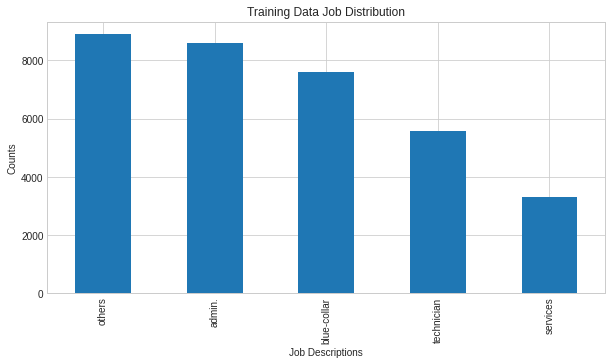

In [ ]:
plt.figure(figsize=(10,5))
categorical_train['job'].value_counts().plot(kind='bar')
plt.title('Training Data Job Distribution')
plt.ylabel('Counts')
plt.xlabel('Job Descriptions')

Text(0.5, 0, 'Job Descriptions')

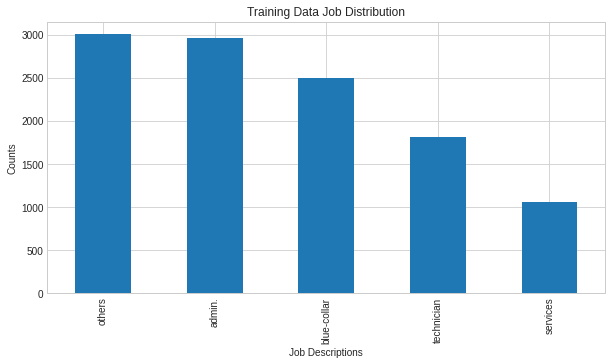

In [ ]:
plt.figure(figsize=(10,5))
categorical_test['job'].value_counts().plot(kind='bar')
plt.title('Training Data Job Distribution')
plt.ylabel('Counts')
plt.xlabel('Job Descriptions')

Text(0.5, 0, 'Education Level')

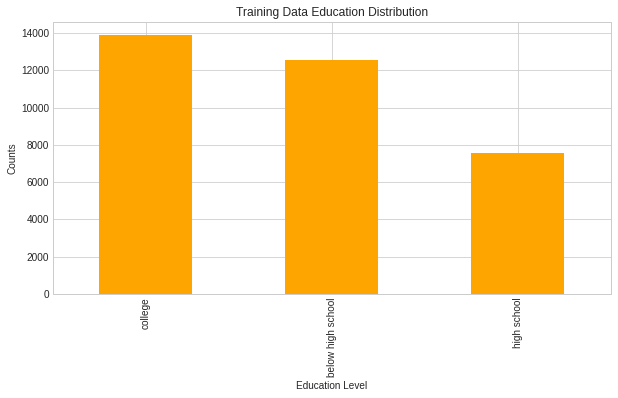

In [ ]:
plt.figure(figsize=(10,5))
categorical_train['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Training Data Education Distribution')
plt.ylabel('Counts')
plt.xlabel('Education Level')

Text(0.5, 0, 'Education Level')

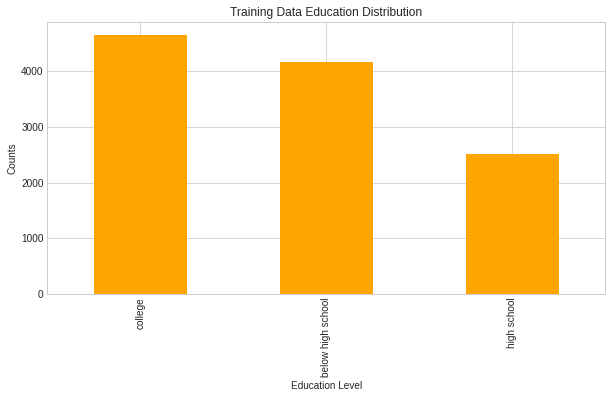

In [ ]:
plt.figure(figsize=(10,5))
categorical_test['education'].value_counts().plot(kind='bar', color='orange')
plt.title('Training Data Education Distribution')
plt.ylabel('Counts')
plt.xlabel('Education Level')

Text(0.5, 0, 'Month')

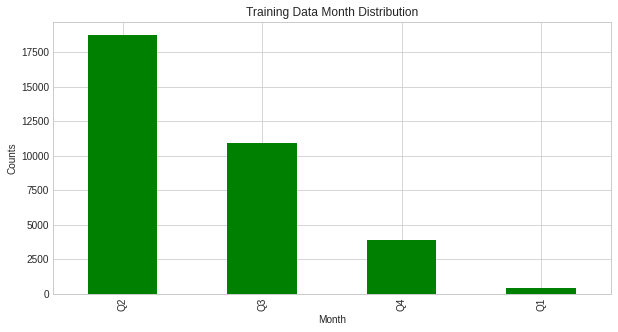

In [ ]:
plt.figure(figsize=(10,5))
categorical_train['month'].value_counts().plot(kind='bar', color='green')
plt.title('Training Data Month Distribution')
plt.ylabel('Counts')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

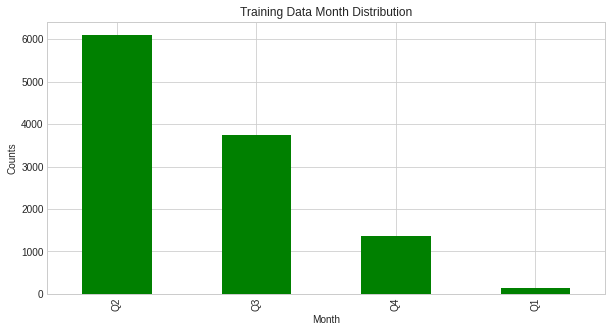

In [ ]:
plt.figure(figsize=(10,5))
categorical_test['month'].value_counts().plot(kind='bar', color='green')
plt.title('Training Data Month Distribution')
plt.ylabel('Counts')
plt.xlabel('Month')

# Feature Engineering

## age and total assets

In [ ]:
continuous_train.columns

Index(['age', 'campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'total_assets',
       'rep_avg_rating', 'customer_length'],
      dtype='object')

360.4
10.98


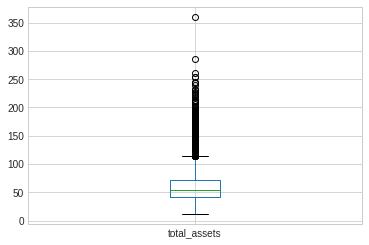

In [ ]:
print(continuous_train['total_assets'].max())
print(continuous_train['total_assets'].min())
boxplot = continuous_train.boxplot('total_assets')

98.0
17.0


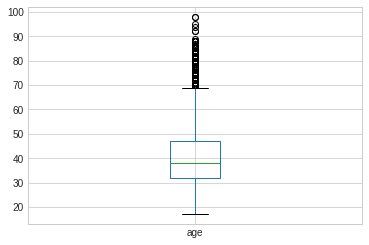

In [ ]:
print(continuous_train['age'].max())
print(continuous_train['age'].min())
boxplot = continuous_train.boxplot('age')

In [ ]:
### feature engineering with total_assets and age
continuous_train['assets/age'] = continuous_train['total_assets']/continuous_train['age']
continuous_test['assets/age'] = continuous_test['total_assets']/continuous_test['age']

In [ ]:
continuous_train['total_assets'].describe()

count    33980.000000
mean        59.161360
std         24.460833
min         10.980000
25%         42.110000
50%         54.710000
75%         71.260000
max        360.400000
Name: total_assets, dtype: float64

In [ ]:
continuous_train['age'].describe()

count    33980.000000
mean        40.030783
std         10.380787
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [ ]:
continuous_train['assets/age'].describe()

count    33980.000000
mean         1.574077
std          0.775238
min          0.209625
25%          1.029948
50%          1.418238
75%          1.931508
max         10.813810
Name: assets/age, dtype: float64

In [ ]:
continuous_train.columns

Index(['age', 'campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'total_assets',
       'rep_avg_rating', 'customer_length', 'assets/age'],
      dtype='object')

In [ ]:
# drop age and total_assets
continuous_train = continuous_train[['campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
                                    'cons.conf.idx', 'euribor3m', 'nr.employed', 'rep_avg_rating',
                                    'customer_length', 'assets/age']]
continuous_test = continuous_test[['campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
                                    'cons.conf.idx', 'euribor3m', 'nr.employed', 'rep_avg_rating',
                                    'customer_length', 'assets/age']]

## customer_ratings and rep_avg_rating

5.0
2.0


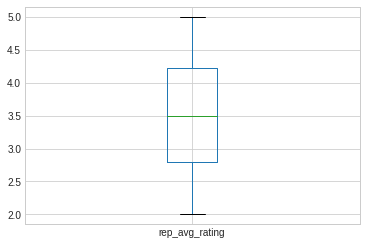

In [ ]:
print(continuous_train['rep_avg_rating'].max())
print(continuous_train['rep_avg_rating'].min())
boxplot = continuous_train.boxplot('rep_avg_rating')

5.0
1.0


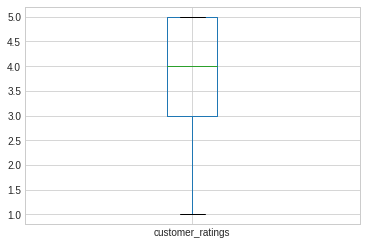

In [ ]:
print(continuous_train['customer_ratings'].max())
print(continuous_train['customer_ratings'].min())
boxplot = continuous_train.boxplot('customer_ratings')

In [ ]:
continuous_train['customer_ratings'].describe()

count    33980.000000
mean         3.983402
std          1.125000
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: customer_ratings, dtype: float64

In [ ]:
continuous_train['rep_avg_rating'].describe()

count    33980.000000
mean         3.498577
std          0.849610
min          2.000000
25%          2.790000
50%          3.500000
75%          4.220000
max          5.000000
Name: rep_avg_rating, dtype: float64

In [ ]:
### feature engineering with customer_ratings and rep_avg_rating
continuous_train['customer_minus_avg_rating'] = continuous_train['customer_ratings'] - continuous_train['rep_avg_rating']
continuous_test['customer_minus_avg_rating'] = continuous_test['customer_ratings'] - continuous_test['rep_avg_rating']
continuous_train['customer_divide_avg_rating'] = continuous_train['customer_ratings'] / continuous_train['rep_avg_rating']
continuous_test['customer_divide_avg_rating'] = continuous_test['customer_ratings'] / continuous_test['rep_avg_rating']

In [ ]:
continuous_train['customer_minus_avg_rating'].describe()

count    33980.000000
mean         0.484825
std          0.591500
min         -2.500000
25%          0.250000
50%          0.500000
75%          0.820000
max          3.000000
Name: customer_minus_avg_rating, dtype: float64

In [ ]:
continuous_train['customer_divide_avg_rating'].describe()

count    33980.000000
mean         1.132499
std          0.218736
min          0.285714
25%          1.066098
50%          1.144165
75%          1.240695
max          2.500000
Name: customer_divide_avg_rating, dtype: float64

In [ ]:
continuous_train.columns

Index(['campaign', 'customer_ratings', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'rep_avg_rating',
       'customer_length', 'assets/age', 'customer_minus_avg_rating',
       'customer_divide_avg_rating'],
      dtype='object')

In [ ]:
# drop age and total_assets
continuous_train = continuous_train[['campaign', 'emp.var.rate', 'cons.price.idx',
                                    'cons.conf.idx', 'euribor3m', 'nr.employed',
                                    'customer_length', 'assets/age', 'customer_minus_avg_rating',
                                     'customer_divide_avg_rating']]
continuous_test = continuous_test[['campaign', 'emp.var.rate', 'cons.price.idx',
                                    'cons.conf.idx', 'euribor3m', 'nr.employed',
                                    'customer_length', 'assets/age', 'customer_minus_avg_rating',
                                     'customer_divide_avg_rating']]

In [ ]:
continuous_train.isna().sum()

campaign                      0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
customer_length               0
assets/age                    0
customer_minus_avg_rating     0
customer_divide_avg_rating    0
dtype: int64

In [ ]:
continuous_test.isna().sum()

campaign                      0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
customer_length               0
assets/age                    0
customer_minus_avg_rating     0
customer_divide_avg_rating    0
dtype: int64

# One-Hot Encoding

In [ ]:
categorical_train_onehot = categorical_train.copy()
categorical_train_onehot = pd.get_dummies(categorical_train_onehot, columns=['job', 'marital', 'education',
                        'housing', 'loan',
                        'contact', 'month', 'day_of_week',
                        'poutcome', 'customer_language',
                        'other_banks', 'pdays', 'previous'], prefix=['job', 'marital', 'education',
                        'housing', 'loan',
                        'contact', 'month', 'day_of_week',
                        'poutcome', 'customer_language',
                        'other_banks', 'pdays', 'previous'])
categorical_train_onehot.head()

,job_admin.,job_blue-collar,job_others,job_services,job_technician,marital_divorced,marital_married,marital_single,marital_unknown,education_below high school,...,customer_language_Other,customer_language_Portuguese,customer_language_Spanish,other_banks_no,other_banks_unknown,other_banks_yes,pdays_0,pdays_1,previous_0,previous_1
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1


In [ ]:
categorical_test_onehot = categorical_test.copy()
categorical_test_onehot = pd.get_dummies(categorical_test_onehot, columns=['job', 'marital', 'education',
                        'housing', 'loan',
                        'contact', 'month', 'day_of_week',
                        'poutcome', 'customer_language',
                        'other_banks', 'pdays', 'previous'], prefix=['job', 'marital', 'education',
                        'housing', 'loan',
                        'contact', 'month', 'day_of_week',
                        'poutcome', 'customer_language',
                        'other_banks', 'pdays', 'previous'])
categorical_test_onehot.head()

,job_admin.,job_blue-collar,job_others,job_services,job_technician,marital_divorced,marital_married,marital_single,marital_unknown,education_below high school,...,customer_language_Other,customer_language_Portuguese,customer_language_Spanish,other_banks_no,other_banks_unknown,other_banks_yes,pdays_0,pdays_1,previous_0,previous_1
0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
assert categorical_train.shape[0] == categorical_train_onehot.shape[0]
assert categorical_test.shape[0] == categorical_test_onehot.shape[0]

# Save Dataframes to CSVs

In [ ]:
#categorical_train_df = categorical_train_onehot.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/categorical_train_onehot.csv', index=True, encoding='utf-8')
categorical_test_df = categorical_test_onehot.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/categorical_test_onehot.csv', index=True, encoding='utf-8')

In [ ]:
#all_continuous_train_pipline = continuous_train.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/continous_train.csv', index=True, encoding='utf-8')
#all_continuous_test_pipline = continuous_test.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/continous_test.csv', index=True, encoding='utf-8')

In [ ]:
#target_y_train = y_train.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/target_y_train.csv', index=True, encoding='utf-8')
#target_y_test = y_test.to_csv('/content/drive/MyDrive/DATA6545 Machine Learning and Predictive Anlysis/Project 2/target_y_test.csv', index=True, encoding='utf-8')